In [1]:
import fix_sys_path
from plasma_classes import *
from plasma_utils import *
from matplotlib import pyplot as plt
from matplotlib import animation
from tqdm import tqdm

In [2]:
root = os.getcwd()


In [3]:
exps = os.listdir(os.path.join(root, "logs"))
exps = list(sorted(exps))
exps

['Te10.0Nx2000_Np20000_h5e-06_tau2.5e-13_n4000000_29_05_2023_00_06_41',
 'Te13.0Nx2000_Np20000_h5e-06_tau2.5e-13_n4000000_29_05_2023_00_07_59',
 'Te15.0Nx2000_Np20000_h5e-06_tau2.5e-13_n4000000_29_05_2023_00_08_54',
 'Te17.0Nx2000_Np20000_h5e-06_tau2.5e-13_n4000000_29_05_2023_00_09_31',
 'Te19.0Nx2000_Np20000_h5e-06_tau2.5e-13_n4000000_29_05_2023_08_34_43',
 'Te20.0Nx1000_Np20000_h1e-05_tau5e-13_n2000000_29_05_2023_00_21_14',
 'Te23.0Nx1000_Np20000_h1e-05_tau5e-13_n1000000_29_05_2023_08_34_17',
 'Te25.0Nx1000_Np20000_h1e-05_tau5e-13_n1000000_29_05_2023_08_34_06',
 'Te27.0Nx1000_Np20000_h1e-05_tau5e-13_n1000000_29_05_2023_08_33_50',
 'Te30.0Nx1000_Np20000_h1e-05_tau5e-13_n1000000_29_05_2023_08_33_34',
 'Te35.0Nx1000_Np20000_h1e-05_tau5e-13_n1000000_29_05_2023_08_33_26']

In [35]:
# exps = ['Te10.0Nx2000_Np20000_h5e-06_tau2.5e-13_n4000000_28_05_2023_10_47_51',
#  'Te11.0Nx2000_Np20000_h5e-06_tau2.5e-13_n4000000_28_05_2023_10_51_49',
#  'Te12.0Nx2000_Np20000_h5e-06_tau2.5e-13_n4000000_28_05_2023_10_50_53',
#  'Te13.0Nx2000_Np20000_h5e-06_tau2.5e-13_n4000000_28_05_2023_10_48_10',
#  'Te14.0Nx2000_Np20000_h5e-06_tau2.5e-13_n4000000_28_05_2023_10_51_01',
#  'Te15.0Nx2000_Np20000_h5e-06_tau2.5e-13_n4000000_28_05_2023_10_48_24',
#  'Te16.0Nx2000_Np20000_h5e-06_tau2.5e-13_n4000000_28_05_2023_10_51_10',
#  'Te17.0Nx2000_Np20000_h5e-06_tau2.5e-13_n4000000_28_05_2023_10_51_21',
#  'Te18.0Nx2000_Np20000_h5e-06_tau2.5e-13_n4000000_28_05_2023_10_51_42',
#  'Te19.0Nx2000_Np20000_h5e-06_tau2.5e-13_n4000000_28_05_2023_10_49_41',
#  'Te20.0Nx1000_Np20000_h1e-05_tau5e-13_n1000000_27_05_2023_22_47_51',
#  'Te23.0Nx1000_Np20000_h1e-05_tau5e-13_n1000000_28_05_2023_18_36_26',]

In [36]:
#exps = ['Te20.0Nx1000_Np20000_h1e-05_tau5e-13_n1000000_27_05_2023_22_47_51']

In [37]:
len(exps)

12

In [38]:
iters = {
    10 : 15000
}

In [7]:
energy_arr = []
sigma_arr = []
for path in tqdm(exps):
    logpath = os.path.join(root, "logs",  path)
    params_file = os.path.join(logpath, "params.bin")
    with open(params_file, "rb") as f:
        params = pickle.load(f)
    time_step = params["periods"]["saving"]
    h = params["geometry"]["L"]/params["numerical"]["N_x"]
    tau = params["numerical"]["tau"]
    time_step = params["periods"]["saving"]

    secondary_counts = 0
    energies = []
    for i, particles in loop_over_states(os.path.join(logpath, "secondary_electrons.bin"), modes=["particles"]):
        if i > 5000*time_step:
            secondary_counts += particles.n_macro
    absorbed_counts = 0
    for i, particles in loop_over_states(os.path.join(logpath, "absorbed_electrons.bin"), modes=["particles"]):
        if i > 5000*time_step:
            absorbed_counts += particles.n_macro
            energy = calc_kinetic_energy(particles, h, tau)
            energies.append(energy/particles.n_macro/particles.q/particles.concentration)
    sigma_arr.append(secondary_counts/absorbed_counts)
    energy_arr.append(np.mean(np.array(energies)))
    

Te10.0Nx2000_Np20000_h5e-06_tau2.5e-13_n4000000_29_05_2023_00_06_41
Te13.0Nx2000_Np20000_h5e-06_tau2.5e-13_n4000000_29_05_2023_00_07_59
Te15.0Nx2000_Np20000_h5e-06_tau2.5e-13_n4000000_29_05_2023_00_08_54
Te17.0Nx2000_Np20000_h5e-06_tau2.5e-13_n4000000_29_05_2023_00_09_31
Te19.0Nx2000_Np20000_h5e-06_tau2.5e-13_n4000000_29_05_2023_08_34_43
Te20.0Nx1000_Np20000_h1e-05_tau5e-13_n2000000_29_05_2023_00_21_14
Te23.0Nx1000_Np20000_h1e-05_tau5e-13_n1000000_29_05_2023_08_34_17
Te25.0Nx1000_Np20000_h1e-05_tau5e-13_n1000000_29_05_2023_08_34_06
Te27.0Nx1000_Np20000_h1e-05_tau5e-13_n1000000_29_05_2023_08_33_50
Te30.0Nx1000_Np20000_h1e-05_tau5e-13_n1000000_29_05_2023_08_33_34
Te35.0Nx1000_Np20000_h1e-05_tau5e-13_n1000000_29_05_2023_08_33_26


In [88]:
energy_arr = -np.array(energy_arr)

In [86]:
energy_arr = energy_arr[:-1]

In [76]:
sigma_arr = np.array(sigma_arr)[:-1]

In [77]:
import numpy as np
from sklearn.linear_model import LinearRegression


# Define the logarithmic transformation function
def log_transform(E, sigma):
    return np.log(E), np.log(sigma)

# Set the constant value E1
E1 = 18.3

# Define your set of points in E-sigma space
E_data = energy_arr/E1
sigma_data = sigma_arr

# Apply logarithmic transformation to the data
E_data, sigma_data = log_transform(E_data, sigma_data)

# Perform linear regression to estimate the value of alpha
regressor = LinearRegression()
regressor.fit(E_data.reshape(-1, 1), sigma_data)
estimated_alpha = regressor.coef_[0]

# Print the estimated value of alpha
print("Estimated alpha:", estimated_alpha)


Estimated alpha: 0.45732990760742015


In [ ]:
temp_arr

[19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 35.0]

In [8]:
sigma_arr

[0.7206603874941804,
 0.7997961494903737,
 0.8501559034363046,
 0.9059711260064253,
 0.9510422135739455,
 0.9881411511679622,
 1.0367783540692186,
 0.9644437186377268,
 0.9574687996544436,
 0.9566913308222543,
 0.9575617978973917]

In [45]:
import numpy as np

# Заданные константы
m = 9.10938356e-31  # Масса электрона в кг
k = 1.380649e-23  # Постоянная Больцмана в Дж/К
T = 300  # Температура в К (пример)

# Расчет средней скорости
v_avg = np.sqrt((3 * T) / (m))

# Вывод результата
print("Средняя скорость электрона:",(m/2*v_avg**2)/T, "м/с")


Средняя скорость электрона: 1.5000000000000002 м/с


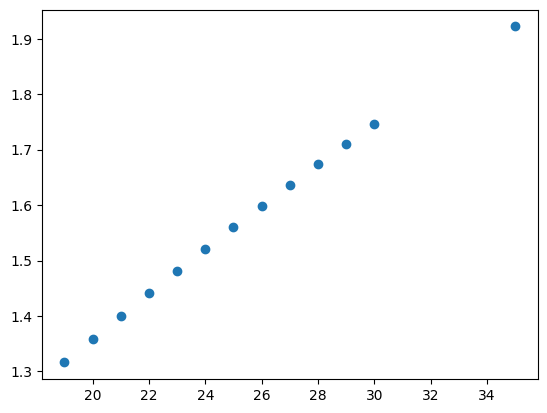

In [46]:
plt.scatter(temp_arr, (np.array(temp_arr)*1.5/18.3)**0.62)

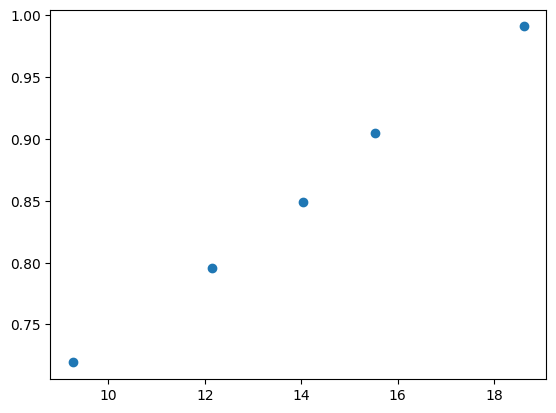

In [89]:
plt.scatter(energy_arr, sigma_arr)

In [90]:
mass_dct = {}
energy_dct = {}
impulse_dct = {}

for path in exps:
    logpath = os.path.join(root, "logs",  path)
    params_file = os.path.join(logpath, "params.bin")
    with open(params_file, "rb") as f:
        params = pickle.load(f)
    time_step = params["periods"]["saving"]
    h = params["geometry"]["L"]/params["numerical"]["N_x"]
    tau = params["numerical"]["tau"]

    for kind in ["absorbed_electrons", "absorbed_ions", "secondary_electrons"]:
        if kind not in energy_dct:
            energy_dct[kind] = []
        if kind not in impulse_dct:
            impulse_dct[kind] = []
        if kind not in mass_dct:
            mass_dct[kind] = []
        energy = 0
        impulse = 0
        mass = 0

        for i, particles in loop_over_states(os.path.join(logpath, kind + ".bin"), modes=["particles"]):
            if i > 15000*time_step:
                mass += particles.n_macro*particles.m*particles.concentration
                energy += calc_kinetic_energy(particles, h, tau)
                impulse += calc_impulse(particles, h, tau)
        energy = energy/(i - 15000*time_step)/tau
        impulse = impulse/(i - 15000*time_step)/tau
        mass = mass/(i - 15000*time_step)/tau
        energy_dct[kind].append(energy)
        impulse_dct[kind].append(impulse)
        mass_dct[kind].append(mass)

    

In [22]:
phi_lst = []
for path in exps:
    phi_per_exp = []
    logpath = os.path.join(root, "logs",  path)
    with open(params_file, "rb") as f:
        params = pickle.load(f)
    n_range = params["geometry"]["neutral_range"]
    for i, nodes, particles, _ in loop_over_states(os.path.join(logpath, "system_states.bin")):
        if i/100 > 15000:
            phi = np.mean(nodes.phi[n_range[0] : n_range[1]])
            phi_per_exp.append(phi)

    phi_lst.append(np.mean(np.array(phi_per_exp)))

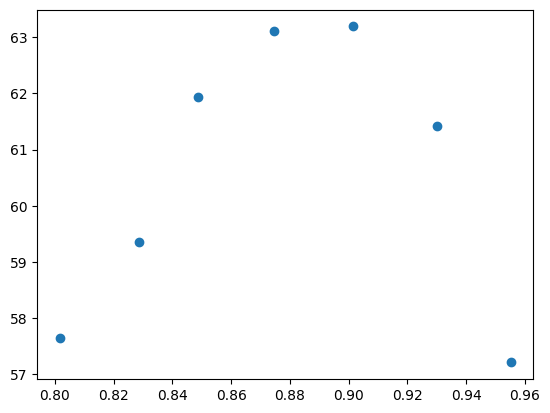

In [23]:
plt.scatter(sigma_arr, phi_lst)

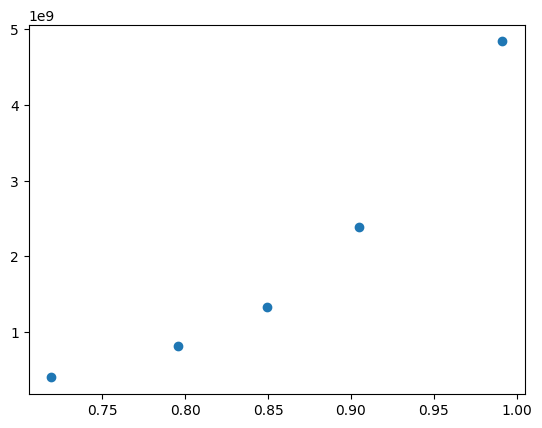

In [91]:
plt.scatter(sigma_arr, energy_dct["absorbed_electrons"])

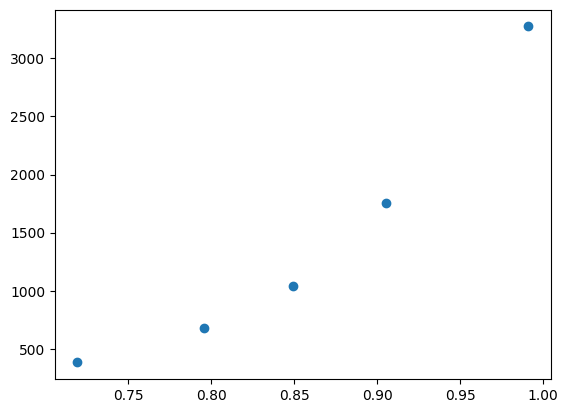

In [92]:
plt.scatter(sigma_arr, impulse_dct["absorbed_electrons"])

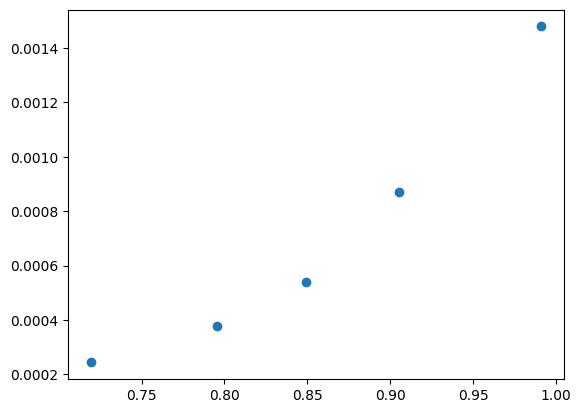

In [93]:
plt.scatter(sigma_arr, mass_dct["absorbed_electrons"])

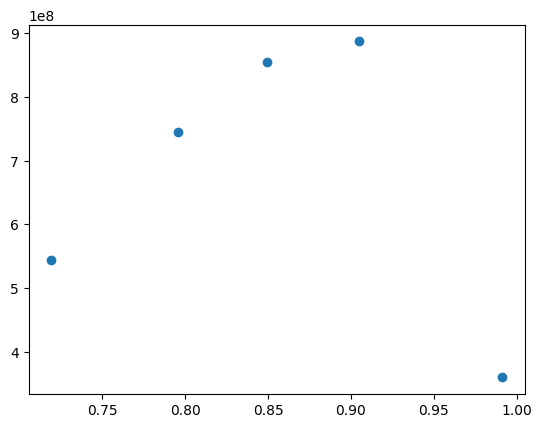

In [94]:
plt.scatter(sigma_arr, energy_dct["absorbed_ions"])

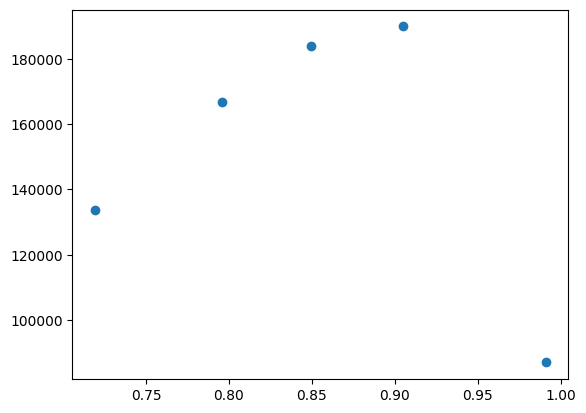

In [95]:
plt.scatter(sigma_arr, impulse_dct["absorbed_ions"])

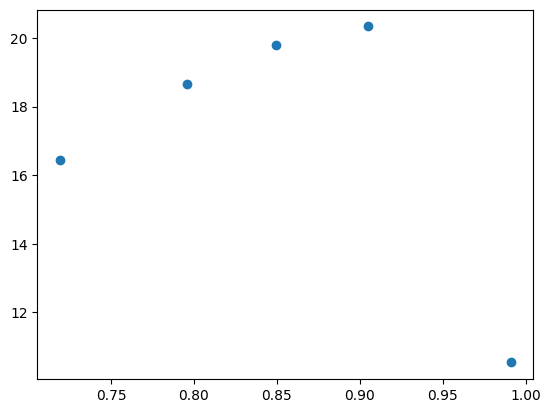

In [96]:
plt.scatter(sigma_arr, mass_dct["absorbed_ions"])

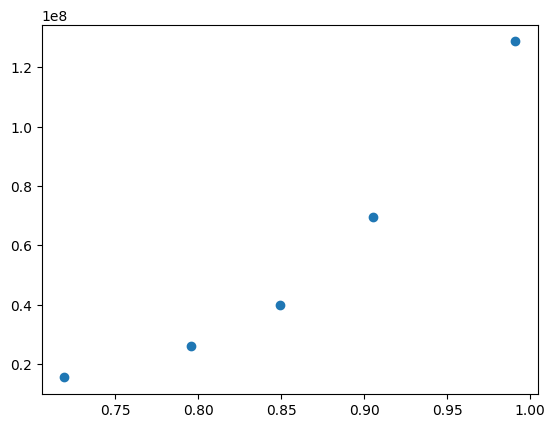

In [97]:
plt.scatter(sigma_arr, energy_dct["secondary_electrons"])

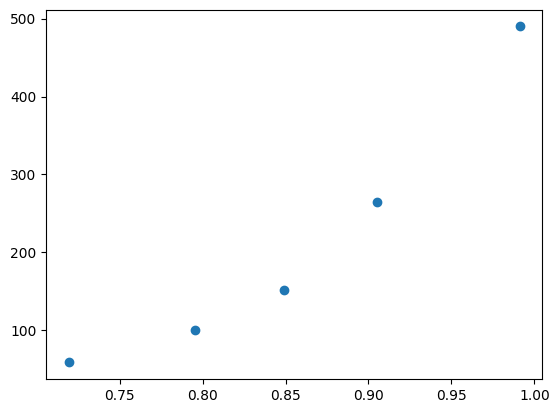

In [98]:
plt.scatter(sigma_arr, impulse_dct["secondary_electrons"])

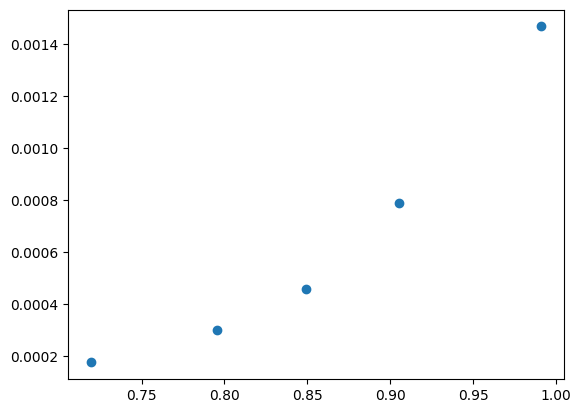

In [99]:
plt.scatter(sigma_arr, mass_dct["secondary_electrons"])